# Restyling

### This notebook introduces image restyling of the input images. The implementation applies diffusion by using Stable Diffusion model. In this notebook, we will provide a step-by-step guide to restyle an image.

Define an input image

In [1]:
from PIL import Image
import os, sys

input_path = '../inputs/restyling/pelican.png'
input_image = Image.open(input_path)

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(current_dir), '..'))
sys.path.append(os.path.join(parent_dir, 'code'))

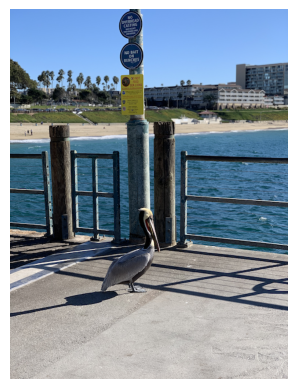

In [2]:
from matplotlib import pyplot as plt

plt.imshow(input_image)
plt.axis('off')
plt.show()

Define the text prompt

In [3]:
prompt = "pelican in a pier, impressionistic style"

Define additional parameters, such as strength, guidance_scale, negative_prompt, steps, to improve the image generation

In [4]:
strength = 0.75
guidance_scale = 7.5
negative_prompt = "poor details, blurry"
steps = 50

Load and prepare the model

In [5]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch

input_image = input_image.convert("RGB")
original_width, original_height = input_image.size

if original_width > original_height:
    init_image = input_image.resize((768, 512))
elif original_width < original_height:
    init_image = input_image.resize((512, 768))
else:
    init_image = input_image.resize((512, 512))

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

images = pipe(prompt=prompt, image=init_image, strength=strength, guidance_scale=guidance_scale, num_inference_steps=steps, negative_prompt=negative_prompt).images
output_image = images[0].resize((original_width, original_height))

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

c:\Users\nobis\anaconda3\envs\image-editing-env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nobis\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\attention_processor.py:1416: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/37 [00:00<?, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\image_processor.py:110: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


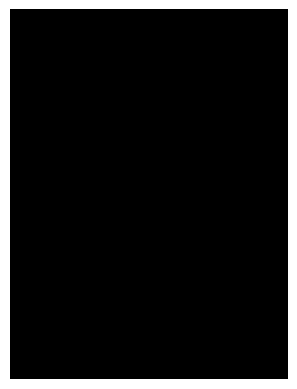

In [6]:
plt.imshow(output_image)
plt.axis('off')
plt.show()

Visualise the result

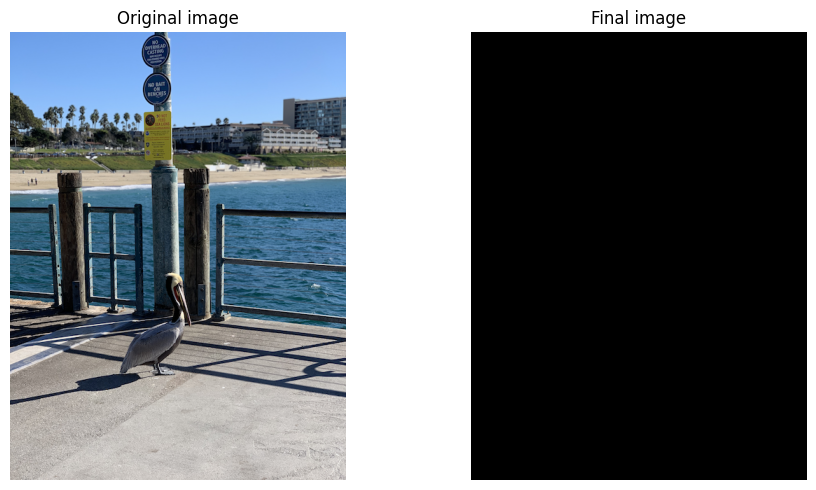

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(input_image)
axs[0].axis('off')
axs[0].set_title('Original image')

# Display the second image in the right subplot
axs[1].imshow(output_image)
axs[1].axis('off')
axs[1].set_title('Final image')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()